In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
#nltk.download_shell()

## Usamos rstrip() para abrir el documento como una lista de mensajes y así ver como están separados. En este caso \t, lo cual utilizaremos después para abrirlo con pandas

In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[1]

'ham\tOk lar... Joking wif u oni...'

In [6]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [7]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                       names=['labels','message'])

In [8]:
messages.head(2)

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [9]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [10]:
messages['length']=messages['message'].apply(len)

In [11]:
messages.head(3)

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

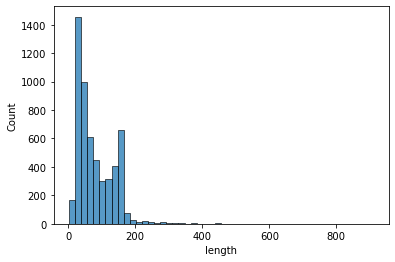

In [13]:
sns.histplot(data=messages, x='length', bins=50)

In [14]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [15]:
messages[messages['length']>900]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

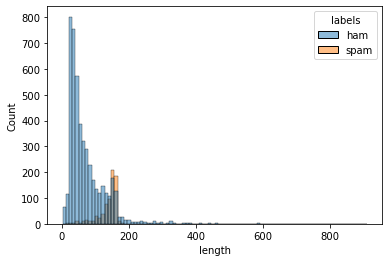

In [16]:
sns.histplot(data=messages, x='length', hue='labels')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb770424f0>,
      dtype=object)

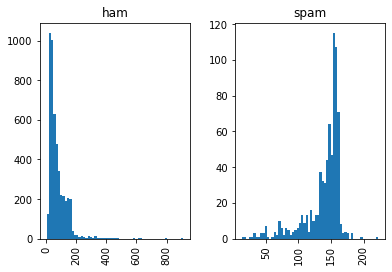

In [17]:
messages.hist(column='length', by='labels', bins=60)

Ahora haremos una función que separará cada mensaje en palabras y nos devolverá una lista. De esta manera podremos vectorizar los mensajes. 

Primero quitaremos las palabras como Eh, mmmm, y cosas del estilo

In [18]:
import string

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

creamos un mensaje random, donde veremos si contiene alguno de los elementos que vemos en string.punctuation

In [20]:
mess = 'Sample message: Oh! it hit the core!!!'

In [21]:
no_punctuation = [c for c in mess
                 if c not in string.punctuation]

In [22]:
no_punctuation

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'O',
 'h',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'i',
 't',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'c',
 'o',
 'r',
 'e']

Ahora veremos como quitar las stopwords(son palabras que no dicen nada, como all, how, any, both). Para eso tenemos una librería

In [23]:
from nltk.corpus import stopwords

Lo probaremos con nuestra frase random anterior. Aunque primero uniremos las letras de nuestra lista

In [24]:
no_punctuation=''.join(no_punctuation)
# Este método une elementos de una lista con lo que pongamos dentro de ''

Ahora separamos las palabras y formamos una lista de palabras

In [25]:
no_punctuation.split()

['Sample', 'message', 'Oh', 'it', 'hit', 'the', 'core']

In [26]:
bunch_of_words = no_punctuation.split()

In [27]:
clean_mess = [word for word in bunch_of_words 
              if word.lower()
             not in stopwords.words('english')]

In [28]:
clean_mess

['Sample', 'message', 'Oh', 'hit', 'core']

## Ahora haremos esto para todos nuestros mensajes con una función

In [29]:
def text_process(mess):
    """
    1. remove punc
    2. remove stopwords
    3. return a list of clean text words
    """
    
    no_punctuation=[character for character in mess if character not in string.punctuation]
    
    no_punctuation=''.join(no_punctuation)
    
    return[word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]
    
    

Ahora aplicaremos esta función a nuestros mensajes para convertirlos en una lista de palabras que queremos. A esto se le llama tokenizar un mensaje, ya que transformamos una text string en tokens

In [30]:
messages['message'].head(3)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
Name: message, dtype: object

In [31]:
messages['message'].head(6).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
Name: message, dtype: object

## Ahora vectorizaremos estas listas de tokens, para que nuestro sklearn algorithm model puede trabajar con ellos

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
bag_of_words_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [34]:
print(len(bag_of_words_transformer.vocabulary_))
# Esto print el número total de palabras

11425


we check our vectorization on a random message. Concretamente el número 4

In [35]:
mess4= messages['message'][3]

In [36]:
print(mess4)

U dun say so early hor... U c already then say...


In [37]:
bow4 = bag_of_words_transformer.transform([mess4])

In [38]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


vemos como hay 7 unique words en el mensaje 4, después de retirar las stopwords, y dos de ellas aparecen dos veces

podemos comprobar cuales son las palabras que se repiten

In [39]:
bag_of_words_transformer.get_feature_names_out()[4068]

'U'

Aplicamos el bag_of_words_transformer a toda la columna de mensajes y obtenemos una matriz enorme, a la que se le suele llamar Sparse Matrix

In [40]:
messages_bow = bag_of_words_transformer.transform(messages['message'])

In [41]:
messages_bow.shape

(5572, 11425)

Podemos comprobar los valores que no son zero dentro de la matriz, y la proporción que representan dentro(sparsity).

In [42]:
messages_bow.nnz

50548

In [43]:

                                #number of rows*number of columns
sparsity=(100*messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1]))
print('sparsity:{}'.format(sparsity))

sparsity:0.07940295412668218


# Ahora empezamos con la TF - IDF. 

### TF-IDF es una medida de como de importante es una palabra dentro de un conjunto de documentos. Comprobar teoría en wikipedia, pero en resumen cuanto más aparece un término en los documentos el valor de la TF-IDF más se acerca a 0

In [44]:
from sklearn.feature_extraction.text import TfidfTransformer

In [45]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

Ahora lo comprobamos con un mensaje random. Donde veremos la importancia de cada palabra dentro del conjunto de documentos 

In [46]:
tfidf4=tfidf_transformer.transform(bow4)

In [47]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


Ahora veremos la TF-IDF de una palabra cualquiera.

In [48]:
tfidf_transformer.idf_[bag_of_words_transformer.vocabulary_['university']]

8.527076498901426

In [49]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

### Ahora que tenemos los mensajes representado como vectores numéricos, podemos entrenar nuestro SPAM-HAM model para clasificar los mensajes nuevos que nos entren en el correo. Elegiremos el Nayv bayes algorythm

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [51]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['labels'])

In [52]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [53]:
messages['labels'][3]

'ham'

## Hemos realizado el train de nuestro modelo con todos los mensajes que había, algo que no se debe hacer ya que ahora no podemos evaluar si el modelo es bueno o no. Por lo tanto, realizaremos nuestro split como hemos hecho siempre, en train y test data. Para ello tenemos que hacer el proceso entero de nuevo(Bag_of_words, CountVectorization, TFIDF)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# X_train, X_test, y_train, y_test = train_test_split(
    # X, y, test_size=0.33, random_state=101)

In [56]:
msg_train,msg_test,label_train,label_test=train_test_split(
    messages['message'],messages['labels'],test_size=0.3)

Podemos repetir el proceso anterior entero o utilizar un método de sklearn que nos ahorrará mucho tiempo

In [57]:
from sklearn.pipeline import Pipeline

Con Pipeline solo tenemos que pasarle los pasos que queremos seguir

In [58]:
pipeline = Pipeline([
    #Nuestro primer item es un tupple. Nombre y lo que hacemos
    #(pasar string a tokens)
    ('bow', CountVectorizer(analyzer=text_process)),
    #Siguiente item TF-IDF
    ('tfidf', TfidfTransformer()),
    # Último paso
    ('classifier', MultinomialNB())
])

In [59]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ffb7a466dc0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [60]:
predictions = pipeline.predict(msg_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1449
        spam       1.00      0.74      0.85       223

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672



### En lugar de usar el MultinomialNB classifier podriamos haber usado el RandomForest classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
pipeline_2 = Pipeline([
    #Nuestro primer item es un tupple. Nombre y lo que hacemos
    #(pasar string a tokens)
    ('bow', CountVectorizer(analyzer=text_process)),
    #Siguiente item TF-IDF
    ('tfidf', TfidfTransformer()),
    # Último paso
    ('classifier', RandomForestClassifier())
])

In [65]:
pipeline_2.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ffb7a466dc0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [66]:
predictions_2 = pipeline_2.predict(msg_test)

In [67]:
print(classification_report(label_test,predictions_2))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1449
        spam       1.00      0.83      0.91       223

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.95      1672
weighted avg       0.98      0.98      0.98      1672

